In [1]:
import librosa
import librosa.display
import matplotlib.pyplot as pt
import numpy as np

In [2]:
filename='Music/Data/genres_original/country/country.00000.wav'
audio_data,sample_rate = librosa.load(filename)

In [3]:
audio_data

array([-0.13415527, -0.19485474, -0.04257202, ...,  0.2260437 ,
        0.15042114,  0.04238892], dtype=float32)

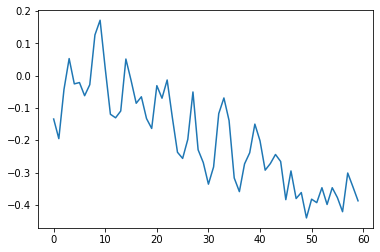

In [7]:
pt.plot(audio_data)
# whole audio file

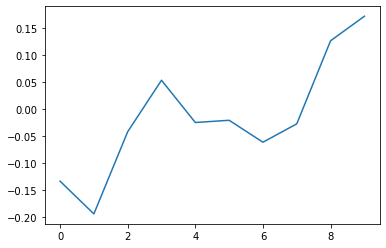

In [5]:
pt.plot(range(10),audio_data[:10])
# wave of first 10 sec

Extract features

In [6]:
# '''
# independent and dependent value extraction
# by-
# Mel-Frequency Cepstral Coefficients(MFCC) 
# allows us classify features for classification
# '''


In [7]:
mfccs=librosa.feature.mfcc(y=audio_data,sr=sample_rate,n_mfcc=21)
print(mfccs.shape)

(21, 1296)


In [8]:
mfccs
# required for classification

array([[-90.66957  , -77.756905 , -90.735115 , ...,   1.7326114,
         12.20389  ,   6.998562 ],
       [ 59.692673 ,  63.68496  ,  69.22136  , ...,  70.84172  ,
         69.29175  ,  74.7072   ],
       [ 27.145987 ,  18.250729 ,  18.027327 , ...,  -1.019901 ,
         -2.260662 ,  -2.1286483],
       ...,
       [  5.1367807,   3.1243958,   5.1358714, ...,  -6.1260157,
         -2.7472024,  -1.8105145],
       [  3.7440264,   7.1048737,  12.505206 , ...,   5.5116243,
          2.9717388,   6.494566 ],
       [  9.52875  ,   5.87904  ,   3.7464364, ...,   3.6417658,
          4.1753063,   6.1075754]], dtype=float32)

In [9]:
ex_feature=[np.mean(mfccs.T,axis=0)]
ex_feature
# for country music country.00000.wav file

[array([-23.104954  ,  70.25588   ,   3.8055308 ,  28.323957  ,
         13.754286  ,   5.728136  ,   3.973779  ,   7.4728084 ,
          2.6279068 ,   8.490234  ,  -2.320208  ,   2.0890799 ,
         -3.3720124 ,   5.1379585 ,  -0.18774131,   0.37143624,
          0.6120877 ,   4.0621276 ,   0.9079196 ,   4.0931935 ,
         -3.1462843 ], dtype=float32)]

In [10]:
import pandas as pd

In [11]:
extracted_features = pd.DataFrame(data=[ex_feature],columns=['features'])
extracted_features['genre']='country'
# since country music file is taken
extracted_features

,features,genre
0,"[-23.104954, 70.25588, 3.8055308, 28.323957, 1...",country


In [12]:
# the above steps are reapeated for all music files of genre
mdata = pd.read_csv('Music/Data/features_30_sec.csv')
mdata.head(10)

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.wav,661794,0.350088,0.088757,0.130228,0.002827,1784.165850,1.297741e+05,2002.449060,85882.761315,...,52.420910,-1.690215,36.524071,-0.408979,41.597103,-2.303523,55.062923,1.221291,46.936035,blues
1,blues.00001.wav,661794,0.340914,0.094980,0.095948,0.002373,1530.176679,3.758501e+05,2039.036516,213843.755497,...,55.356403,-0.731125,60.314529,0.295073,48.120598,-0.283518,51.106190,0.531217,45.786282,blues
2,blues.00002.wav,661794,0.363637,0.085275,0.175570,0.002746,1552.811865,1.564676e+05,1747.702312,76254.192257,...,40.598766,-7.729093,47.639427,-1.816407,52.382141,-3.439720,46.639660,-2.231258,30.573025,blues
3,blues.00003.wav,661794,0.404785,0.093999,0.141093,0.006346,1070.106615,1.843559e+05,1596.412872,166441.494769,...,44.427753,-3.319597,50.206673,0.636965,37.319130,-0.619121,37.259739,-3.407448,31.949339,blues
4,blues.00004.wav,661794,0.308526,0.087841,0.091529,0.002303,1835.004266,3.433999e+05,1748.172116,88445.209036,...,86.099236,-5.454034,75.269707,-0.916874,53.613918,-4.404827,62.910812,-11.703234,55.195160,blues
5,blues.00005.wav,661794,0.302456,0.087532,0.103494,0.003981,1831.993940,1.030482e+06,1729.653287,201910.508633,...,72.549225,-1.838263,68.702026,-2.783800,42.447453,-3.047909,39.808784,-8.109991,46.311005,blues
6,blues.00006.wav,661794,0.291328,0.093981,0.141874,0.008803,1459.366472,4.378594e+05,1389.009131,185023.239545,...,83.248245,-10.913176,56.902153,-6.971336,38.231800,-3.436505,48.235741,-6.483466,70.170364,blues
7,blues.00007.wav,661794,0.307955,0.092903,0.131822,0.005531,1451.667066,4.495682e+05,1577.270941,168211.938804,...,70.438438,-10.568935,52.090893,-10.784515,60.461330,-4.690678,65.547516,-8.630722,56.401436,blues
8,blues.00008.wav,661794,0.408879,0.086512,0.142416,0.001507,1719.368948,1.632828e+05,2031.740381,105542.718193,...,50.563751,-7.041824,28.894934,2.695248,36.889568,3.412305,33.698597,-2.715692,36.418430,blues
9,blues.00009.wav,661794,0.273950,0.092316,0.081314,0.004347,1817.150863,2.982361e+05,1973.773306,114070.112591,...,59.314602,-1.916804,58.418438,-2.292661,83.205231,2.881967,77.082222,-4.235203,91.468811,blues


In [13]:
# split into dependent and independent values
X = mdata.iloc[:,19:-1:2].values
X

array([[-1.13570648e+02,  1.21571793e+02, -1.91681423e+01, ...,
        -4.08979177e-01, -2.30352259e+00,  1.22129071e+00],
       [-2.07501694e+02,  1.23991264e+02,  8.95512676e+00, ...,
         2.95072943e-01, -2.83518016e-01,  5.31216502e-01],
       [-9.07225952e+01,  1.40446304e+02, -2.90938892e+01, ...,
        -1.81640697e+00, -3.43972039e+00, -2.23125839e+00],
       ...,
       [-1.24952271e+02,  1.15177155e+02, -4.79751511e+01, ...,
         3.44097757e+00, -1.25880699e+01, -2.10633659e+00],
       [-2.25007751e+02,  1.23646751e+02, -9.72417450e+00, ...,
         1.55620730e+00, -5.04189682e+00, -3.59064364e+00],
       [-2.35161972e+02,  1.23870110e+02, -2.25383949e+01, ...,
         2.83460394e-02, -2.02578259e+00,  1.15523911e+00]])

In [14]:
# y = np.array(pd.get_dummies(y))
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
lab = LabelEncoder()
y=mdata['label']
y=to_categorical(lab.fit_transform(y))
y

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=40)

In [17]:
X_train.shape

(800, 20)

In [18]:
X_train

array([[-202.19050598,   75.24043274,  -14.23118973, ...,   -0.51365799,
          -6.79153728,   -8.44015694],
       [-275.40060425,  125.3323288 ,  -41.02280045, ...,    2.68265152,
          -2.04551244,   -8.06264305],
       [ -29.32649612,  108.64618683,  -25.54888153, ...,    1.93365932,
          -6.32723665,   -1.30421412],
       ...,
       [-179.34713745,  136.4690094 ,  -26.67313766, ...,  -10.78451538,
          -4.69067764,   -8.63072205],
       [-256.08758545,  163.09742737,  -22.8726387 , ...,   -2.41586995,
          -0.54753   ,   -4.78163052],
       [ -68.01875305,   66.34893799,   11.85679054, ...,    1.38596582,
           2.17981648,    2.24873352]])

In [19]:
y_test.shape

(200, 10)

model creation

In [20]:
import tensorflow as tf

In [21]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [22]:
# no of genre
num_label = y.shape[1]
num_label

10

In [23]:
model = Sequential()
# first layer
model.add(Dense(100,input_shape=(20,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# third layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
# fourth layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# final layer
model.add(Dense(num_label))
model.add(Activation('softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               2100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 200)               4

In [25]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [31]:
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs=200
num_batch_size=40
checkpointer = ModelCheckpoint(filepath='saved_models/music_classification.hdf5',verbose=1,save_best_only=True)
start = datetime.now()

model.fit(X,y,batch_size=num_batch_size,epochs=num_epochs,validation_data=(X_test,y_test),callbacks=[checkpointer])

dur = datetime.now()-start
print(dur)

Epoch 1/200
12/25 [=============>................] - ETA: 0s - loss: 1.3144 - accuracy: 0.5250
Epoch 1: val_loss improved from inf to 1.18966, saving model to saved_models\music_classification.hdf5
25/25 [==============================] - 0s 9ms/step - loss: 1.3495 - accuracy: 0.4930 - val_loss: 1.1897 - val_accuracy: 0.5850
Epoch 2/200
13/25 [==============>...............] - ETA: 0s - loss: 1.3403 - accuracy: 0.5019
Epoch 2: val_loss did not improve from 1.18966
25/25 [==============================] - 0s 6ms/step - loss: 1.3419 - accuracy: 0.5000 - val_loss: 1.2092 - val_accuracy: 0.6050
Epoch 3/200
24/25 [===========================>..] - ETA: 0s - loss: 1.3693 - accuracy: 0.4865
Epoch 3: val_loss did not improve from 1.18966
25/25 [==============================] - 0s 6ms/step - loss: 1.3762 - accuracy: 0.4870 - val_loss: 1.2297 - val_accuracy: 0.5400
Epoch 4/200
13/25 [==============>...............] - ETA: 0s - loss: 1.3648 - accuracy: 0.4692
Epoch 4: val_loss improved from 1.18

25/25 [==============================] - 0s 17ms/step - loss: 1.3006 - accuracy: 0.5460 - val_loss: 1.0786 - val_accuracy: 0.6000
Epoch 30/200
18/25 [====================>.........] - ETA: 0s - loss: 1.3010 - accuracy: 0.5306
Epoch 30: val_loss did not improve from 1.07860
25/25 [==============================] - 0s 8ms/step - loss: 1.3234 - accuracy: 0.5220 - val_loss: 1.1090 - val_accuracy: 0.6250
Epoch 31/200
23/25 [==========================>...] - ETA: 0s - loss: 1.2437 - accuracy: 0.5196
Epoch 31: val_loss did not improve from 1.07860
25/25 [==============================] - 0s 7ms/step - loss: 1.2496 - accuracy: 0.5140 - val_loss: 1.1127 - val_accuracy: 0.6050
Epoch 32/200
22/25 [=========================>....] - ETA: 0s - loss: 1.2628 - accuracy: 0.5375
Epoch 32: val_loss did not improve from 1.07860
25/25 [==============================] - 0s 7ms/step - loss: 1.2631 - accuracy: 0.5370 - val_loss: 1.0991 - val_accuracy: 0.5900
Epoch 33/200
24/25 [===========================>..]

Epoch 58/200
23/25 [==========================>...] - ETA: 0s - loss: 1.2274 - accuracy: 0.5522
Epoch 58: val_loss did not improve from 0.98707
25/25 [==============================] - 0s 10ms/step - loss: 1.2374 - accuracy: 0.5540 - val_loss: 1.0079 - val_accuracy: 0.6250
Epoch 59/200
18/25 [====================>.........] - ETA: 0s - loss: 1.2102 - accuracy: 0.5389
Epoch 59: val_loss did not improve from 0.98707
25/25 [==============================] - 0s 8ms/step - loss: 1.2195 - accuracy: 0.5540 - val_loss: 0.9956 - val_accuracy: 0.6150
Epoch 60/200
14/25 [===============>..............] - ETA: 0s - loss: 1.1837 - accuracy: 0.5714
Epoch 60: val_loss did not improve from 0.98707
25/25 [==============================] - 0s 6ms/step - loss: 1.2032 - accuracy: 0.5750 - val_loss: 1.0052 - val_accuracy: 0.6450
Epoch 61/200
21/25 [========================>.....] - ETA: 0s - loss: 1.2420 - accuracy: 0.5464
Epoch 61: val_loss did not improve from 0.98707
25/25 [=============================

25/25 [==============================] - 0s 10ms/step - loss: 1.2020 - accuracy: 0.5580 - val_loss: 0.9454 - val_accuracy: 0.6550
Epoch 87/200
18/25 [====================>.........] - ETA: 0s - loss: 1.2199 - accuracy: 0.5694
Epoch 87: val_loss did not improve from 0.93812
25/25 [==============================] - 0s 8ms/step - loss: 1.2250 - accuracy: 0.5670 - val_loss: 0.9732 - val_accuracy: 0.6350
Epoch 88/200
15/25 [=================>............] - ETA: 0s - loss: 1.1830 - accuracy: 0.5900
Epoch 88: val_loss did not improve from 0.93812
25/25 [==============================] - 0s 5ms/step - loss: 1.1923 - accuracy: 0.5730 - val_loss: 0.9642 - val_accuracy: 0.6350
Epoch 89/200
21/25 [========================>.....] - ETA: 0s - loss: 1.1754 - accuracy: 0.5702
Epoch 89: val_loss did not improve from 0.93812
25/25 [==============================] - 0s 7ms/step - loss: 1.1779 - accuracy: 0.5720 - val_loss: 0.9595 - val_accuracy: 0.6450
Epoch 90/200
19/25 [=====================>........]

13/25 [==============>...............] - ETA: 0s - loss: 1.0418 - accuracy: 0.6365
Epoch 144: val_loss did not improve from 0.82707
25/25 [==============================] - 0s 6ms/step - loss: 1.0745 - accuracy: 0.6210 - val_loss: 0.8317 - val_accuracy: 0.7250
Epoch 145/200
13/25 [==============>...............] - ETA: 0s - loss: 1.1210 - accuracy: 0.5904
Epoch 145: val_loss improved from 0.82707 to 0.82293, saving model to saved_models\music_classification.hdf5
25/25 [==============================] - 0s 8ms/step - loss: 1.1189 - accuracy: 0.5900 - val_loss: 0.8229 - val_accuracy: 0.7100
Epoch 146/200
14/25 [===============>..............] - ETA: 0s - loss: 1.1106 - accuracy: 0.6125
Epoch 146: val_loss improved from 0.82293 to 0.81371, saving model to saved_models\music_classification.hdf5
25/25 [==============================] - 0s 7ms/step - loss: 1.0818 - accuracy: 0.6050 - val_loss: 0.8137 - val_accuracy: 0.7400
Epoch 147/200
14/25 [===============>..............] - ETA: 0s - loss

Epoch 173/200
13/25 [==============>...............] - ETA: 0s - loss: 1.0618 - accuracy: 0.6038
Epoch 173: val_loss did not improve from 0.76358
25/25 [==============================] - 0s 6ms/step - loss: 1.0483 - accuracy: 0.6360 - val_loss: 0.7825 - val_accuracy: 0.7150
Epoch 174/200
14/25 [===============>..............] - ETA: 0s - loss: 1.0815 - accuracy: 0.5946
Epoch 174: val_loss did not improve from 0.76358
25/25 [==============================] - 0s 6ms/step - loss: 1.0807 - accuracy: 0.6060 - val_loss: 0.7856 - val_accuracy: 0.7550
Epoch 175/200
15/25 [=================>............] - ETA: 0s - loss: 1.0906 - accuracy: 0.6133
Epoch 175: val_loss did not improve from 0.76358
25/25 [==============================] - 0s 6ms/step - loss: 1.0507 - accuracy: 0.6130 - val_loss: 0.7769 - val_accuracy: 0.7100
Epoch 176/200
14/25 [===============>..............] - ETA: 0s - loss: 1.0404 - accuracy: 0.5946
Epoch 176: val_loss did not improve from 0.76358
25/25 [======================

In [43]:
def extract_features(f):
    aud_data,aud_rate=librosa.load(f)
    m=librosa.feature.mfcc(y=aud_data,sr=aud_rate,n_mfcc=20)
    return np.mean(m.T,axis=0,dtype=float)

file = ''
pr_feat = extract_features(file).reshape(1,-1)
output=model.predict(pr_feat)
a=np.argmax(output,axis=1)
cl = lab.inverse_transform(a)
cl


1/1 [==============================] - 0s 24ms/step


array(['classical'], dtype=object)

In [42]:
test_accu = model.evaluate(X,y,verbose=0)
test_accu

[0.7437635660171509, 0.7639999985694885]

ui

In [29]:
# from PyQt5 import QtWidgets,uic
# from pyqtgraph import PlotWidget, plot
# import pyqtgraph as pg
# import sys

In [30]:
# qt = QtWidgets.QApplication([])
# win =  uic.loadUi("music_ui.ui")
# win.show()